## PRiAD 4 - Improved

# Uczenie nienadzorowane

Tematem labolatorium jest uczenie nienadzorowane - rodzaj uczenia maszynowego które polega na odkrywaniu w zbiorze danych wzorów przy minimalnej ingerencji człowieka. Zostaną pokazane 2 metody grupowania: grupowanie hierarchiczne aglomeracyjne oraz metoda k-średnich. Ponadto na przykładzie koszyka zakupowego zostanie zaprezentowany algorytm Apriori, który pozwala na znajdowanie korelacji pomiędzy przedmiotami.

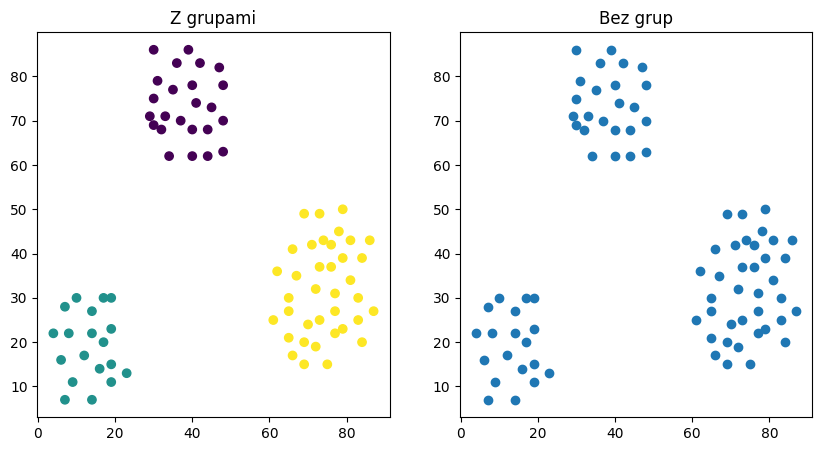

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# import danych
def mk_dataframes(file_name):
    data_og = pd.read_csv(file_name)
    data_noclass = data_og.iloc[:,:-1]
    # usunięcie ostatniej kolumny z grupami

    #data_noclass = data_og.drop(columns=["klasa"])
    # usunięcie ostatniej kolumny z datami za pomocą nazwy kolumny

    return (data_og, data_noclass)
# można zmienić zestaw danych na inny z podanych danych testowych, aby zobaczyć jak poszczególne metody różnią się między sobą

data_og, data_noclass = mk_dataframes("dane1.csv")


# pokazanie początku danych
#print(data_og.head())
#print(data_noclass.head())
plt.figure(figsize=(10, 5))

# wykres z grupami
plt.subplot(1,2,1)
plt.title("Z grupami")
plt.scatter(x = data_og["atrybut1"], y = data_og["atrybut2"], c=data_og['klasa'].astype('category').cat.codes)
# metody użyte przy opisie grup: astype('category') - konwersja kolumny na typ 'category', cat - kolejna konwersja na typ, który pozwala na użycie metody codes, codes - zwraca tablicę z wartościami numerycznymi, które odpowiadają poszczególnym klasom
# w uproszczeniu te trzy metody konwertują kolumnę na typy liczbowe odpowiadające poszczególnym grupom
# metody te można pominąć, jeżeli grupy są zapisane w formacie liczbowym

# wykres bez grup
plt.subplot(1,2,2)
plt.title("Bez grup")
plt.scatter(x = data_noclass["atrybut1"], y = data_noclass["atrybut2"])

# 1. Hierarchiczne grupowanie aglomeracyjne

Jedną z najważniejszych metod uczenia nienadzorowanego jest grupowanie danych. Metody dające podobne rezultaty znajdują się równierz w panteonie uczenia nadzorowanego, jednakże wymagają one znania wcześniej grup przynajmniej części obiektów. Do grupowania wykorzystuje się prawdopodobieństwo które jest wyliczane przy użyciu:
+ metryk odległości między klastrami, takich jak Euklidesowa, miejska (znana również jako Manhattana), Czebyszewa, Mińkowskiego, Canberra
+ metod wyboru punktów które reprezentują dane klastry, takie jak Warda, najdalszego i najbliższego sąsiedztwa, średniej grupowej, mediany oraz środka ciężkości.

[Źródło](https://pl.wikipedia.org/wiki/Klastrowanie_hierarchiczne)

**Grupowanie Hierarchiczne** polaga na łączeniu obiektów w klastry, czyli grupy, które są do siebie najbardziej podobne według powyższych metod i metryk. Grupowanie można przedstawić na dendogramie, czyli diagramie przedstawiającym połączenia w postaci drzewa. Są dwa podejścia do budowania hierarchii grup:
+ Aglomeracyjne - początkowo każdy obiekt jest oddzielnym klastrem,  któ©e następnie są łączone
+ Rozdzielające (podziałowe) - początkowo wszystkie obiekty należą do jednego klastru, a następnie są dzielone na mniejsze skupiska

W tym ćwiczeniu pokazana będzie metoda aglomeracyjna

Poniżej pokazane są różne wyniki grupowań, dla różnych kombinacji metod i metryk

Opisy metod:
+ average - średnie odległości pomiędzy grupami
+ complete - maksymalne odległości pomiędzy grupami
+ single - minimalne odległości pomiędzy grupami
+ ward - minimalne wariancje między łączonymi grupami

Opisy metryk:
+ Euklidesowa - Najprostsza miara, odległość w linii prostej
+ Miejska/Manhattana - Suma odległości prostych //todo
+ Czybyszewa - Maksymalna różnica pomiędzy warościami punktów
+ Mińkowskiego - Suma kwadratów różnic współrzędnych
+ Canberra - Suma względnych błędów absolutnych pomiędzy wartościami

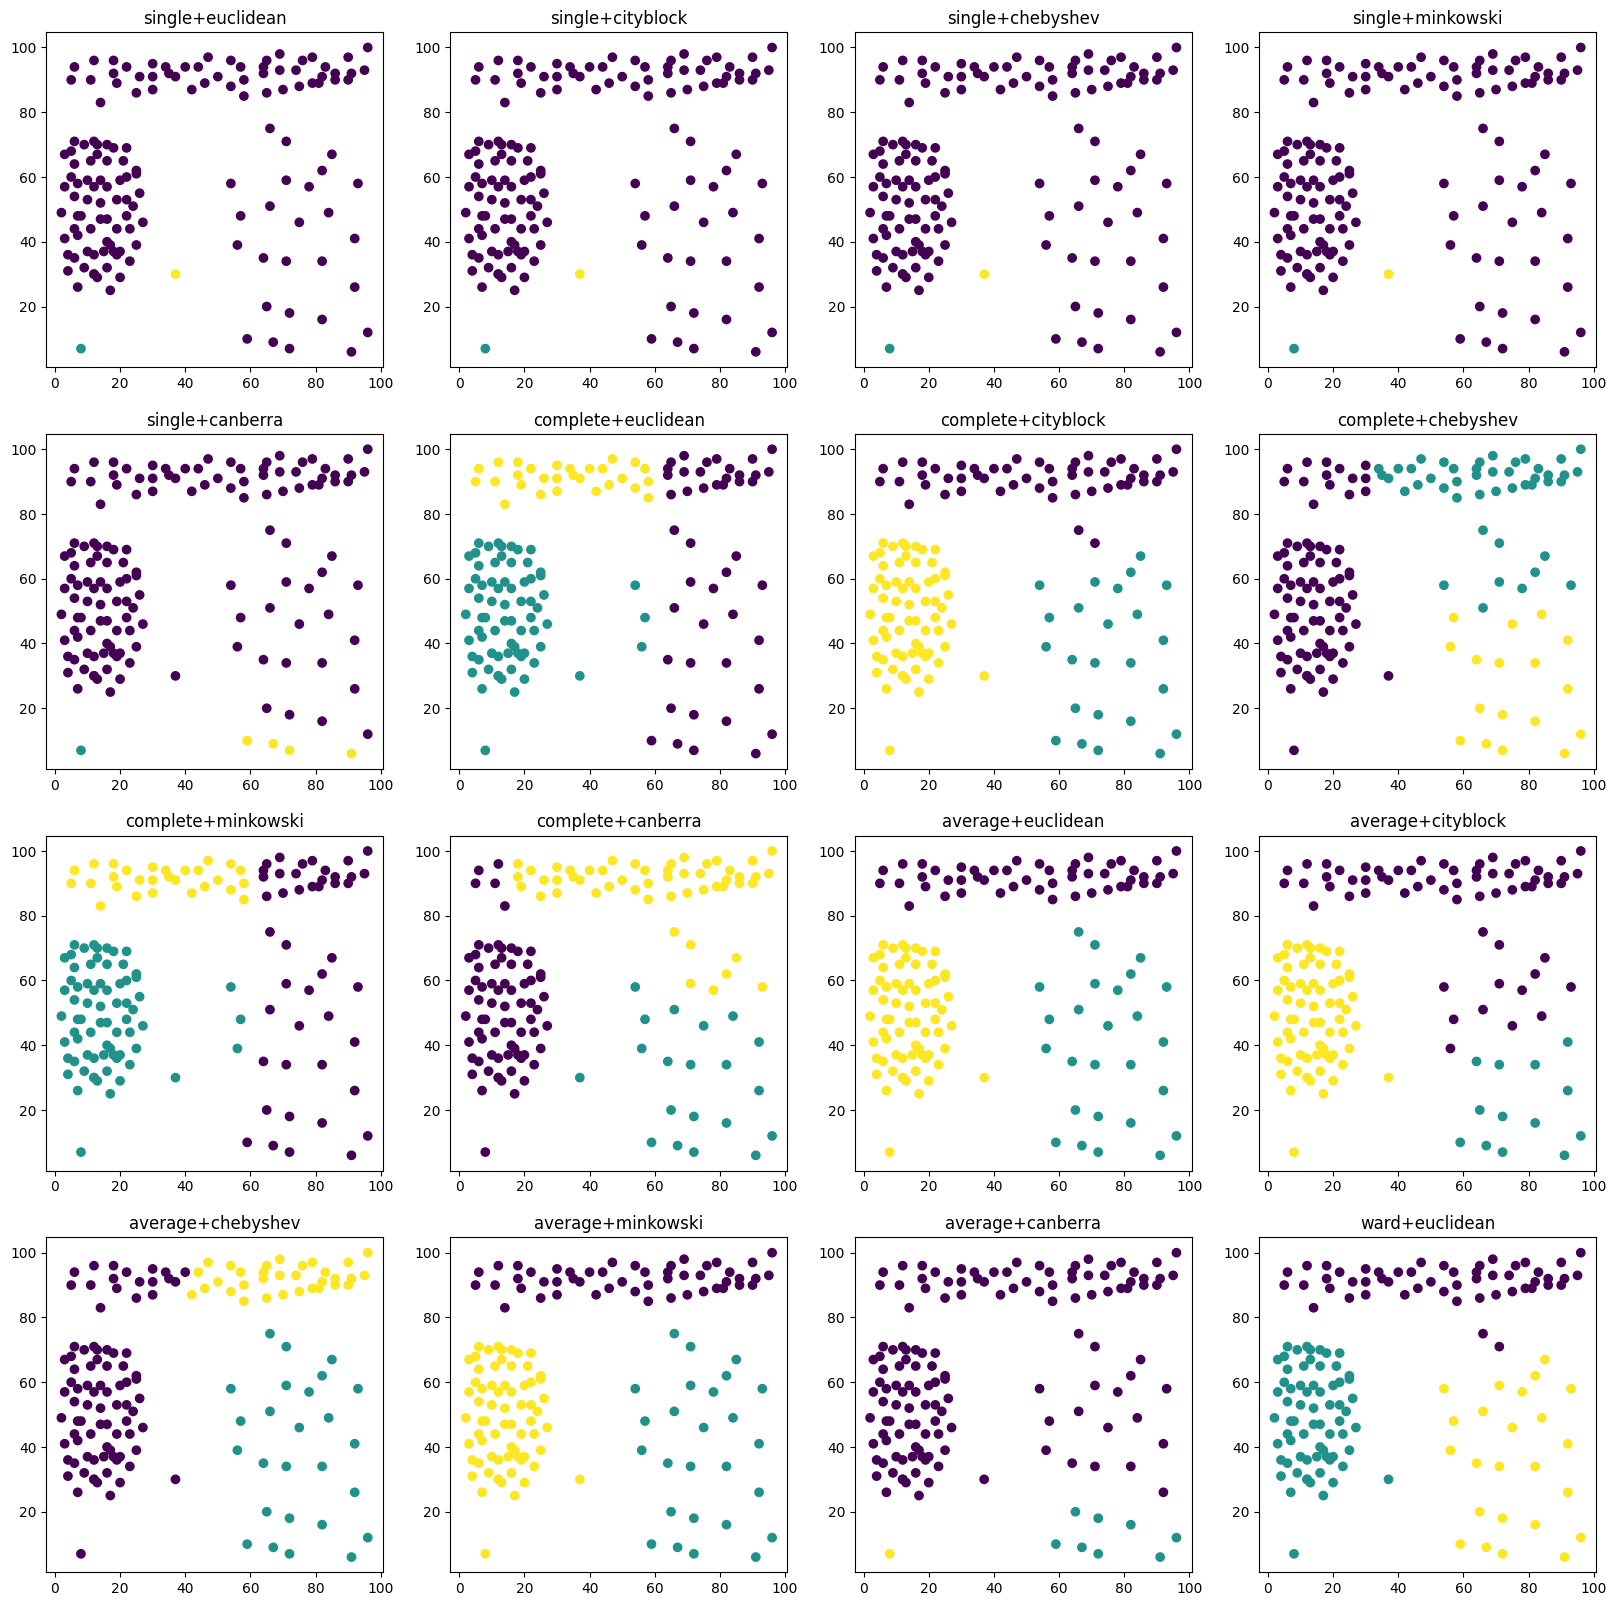

In [2]:
from sklearn.cluster import AgglomerativeClustering
#dane6.csv ma 3 różne grupy
#ward działa tylko z euclidean, dlatego nie ma wszystkich możliwych kombinacji

data_og, data_noclass = mk_dataframes("dane6.csv")

methods = ["single", "complete", "average"]
metrics = ["euclidean", "cityblock", "chebyshev", "minkowski", "canberra"]

plt.figure(figsize=(20, 20))
#wszystkie kombinacje powyższych metod i metryk
for metric in range(5):
    for method in range(3):
        plt.subplot(4, 4, method*5+metric+1)
        plt.title(f"{methods[method]}+{metrics[metric]}")
        clusters = AgglomerativeClustering(n_clusters=3, metric=metrics[metric], linkage=methods[method])
        clusters.fit(data_noclass)
        plt.scatter(data_noclass["atrybut1"], data_noclass["atrybut2"], c=clusters.labels_)

#metoda ward
plt.subplot(4, 4, 16)
plt.title("ward+euclidean")
clusters = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
clusters.fit(data_noclass)
plt.scatter(data_noclass["atrybut1"], data_noclass["atrybut2"], c=clusters.labels_)

Poniżaj grupuję dane z pliku `dane1.csv` zapisane w zmiennej `data_og` i `data_noclass` oraz tworzę dendrogramy na 3 sposoby, przy użyciu kolejno pakietów `scipy`, `sklearn` i `plotly`, poprzedzanie importami odpowiednich pakietów

In [3]:
data_og, data_noclass = mk_dataframes("dane1.csv")

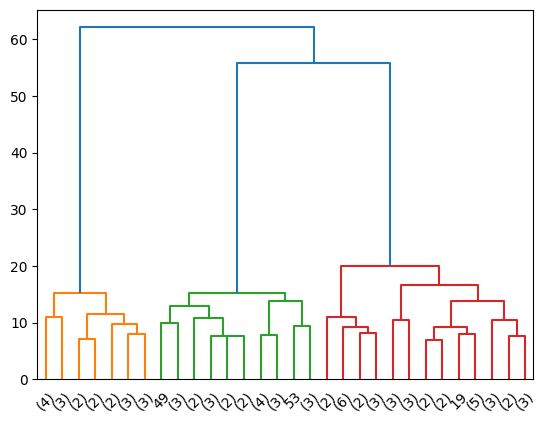

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(data_noclass, method = "average", metric = "euclidean")
dg = dendrogram(linked, truncate_mode = 'lastp')
#przypisanie dendrogramu do zmiennej jest zrobione tylko dlatego, że w przeciwnym wypadku jupyter wyświetla to co dendrogram zwraca

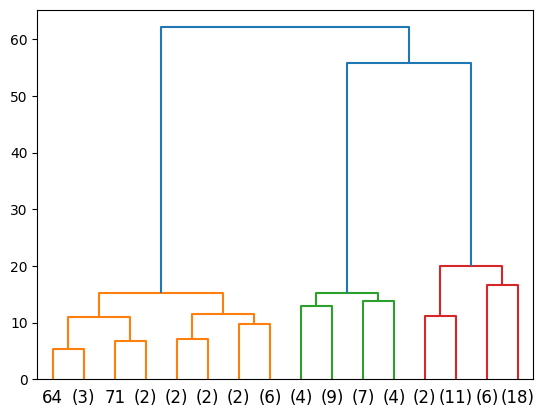

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
       current_count = 0
       for child_idx in merge:
           if child_idx < n_samples:
               current_count += 1
           else:
               current_count += counts[child_idx - n_samples]
       counts[i] = current_count

   linkage_matrix = np.column_stack(
       [model.children_, model.distances_, counts]
   ).astype(float)

   dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,  metric="euclidean", linkage="average")
model = model.fit(data_noclass)

plot_dendrogram(model, truncate_mode="level", p=3)

[Source](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

Poniższy kod nie używa standardowych pakietów, możliwe że trzeba doinstalować pakiety `plotly` oraz `nbformat`

In [6]:
import plotly.figure_factory as ff

fig = ff.create_dendrogram(data_noclass)
fig.update_layout(width=800, height=500)
fig.show()

Aby wyznaczyć optymalną kombinację metod oraz metryk, można posłużyć się mapą ciepła, w tym przypadku nazywaną `macierzą pomyłek`, która porównuje oryginalne grupy oraz te wyznaczone przez nas i algorytm spełni swoje zadanie, jeżeli dokładnie 1 wartość w każdym rzędzie i kolumnie nie jest 0.

Poniżej znajdują się porównania 4 metod z metryką *Euklidesową*. Pierwsze kolumna wyświetla oryginalne dane, druga wyniki grupowania naszych algorytmów, a trzecia mapę ciepła.

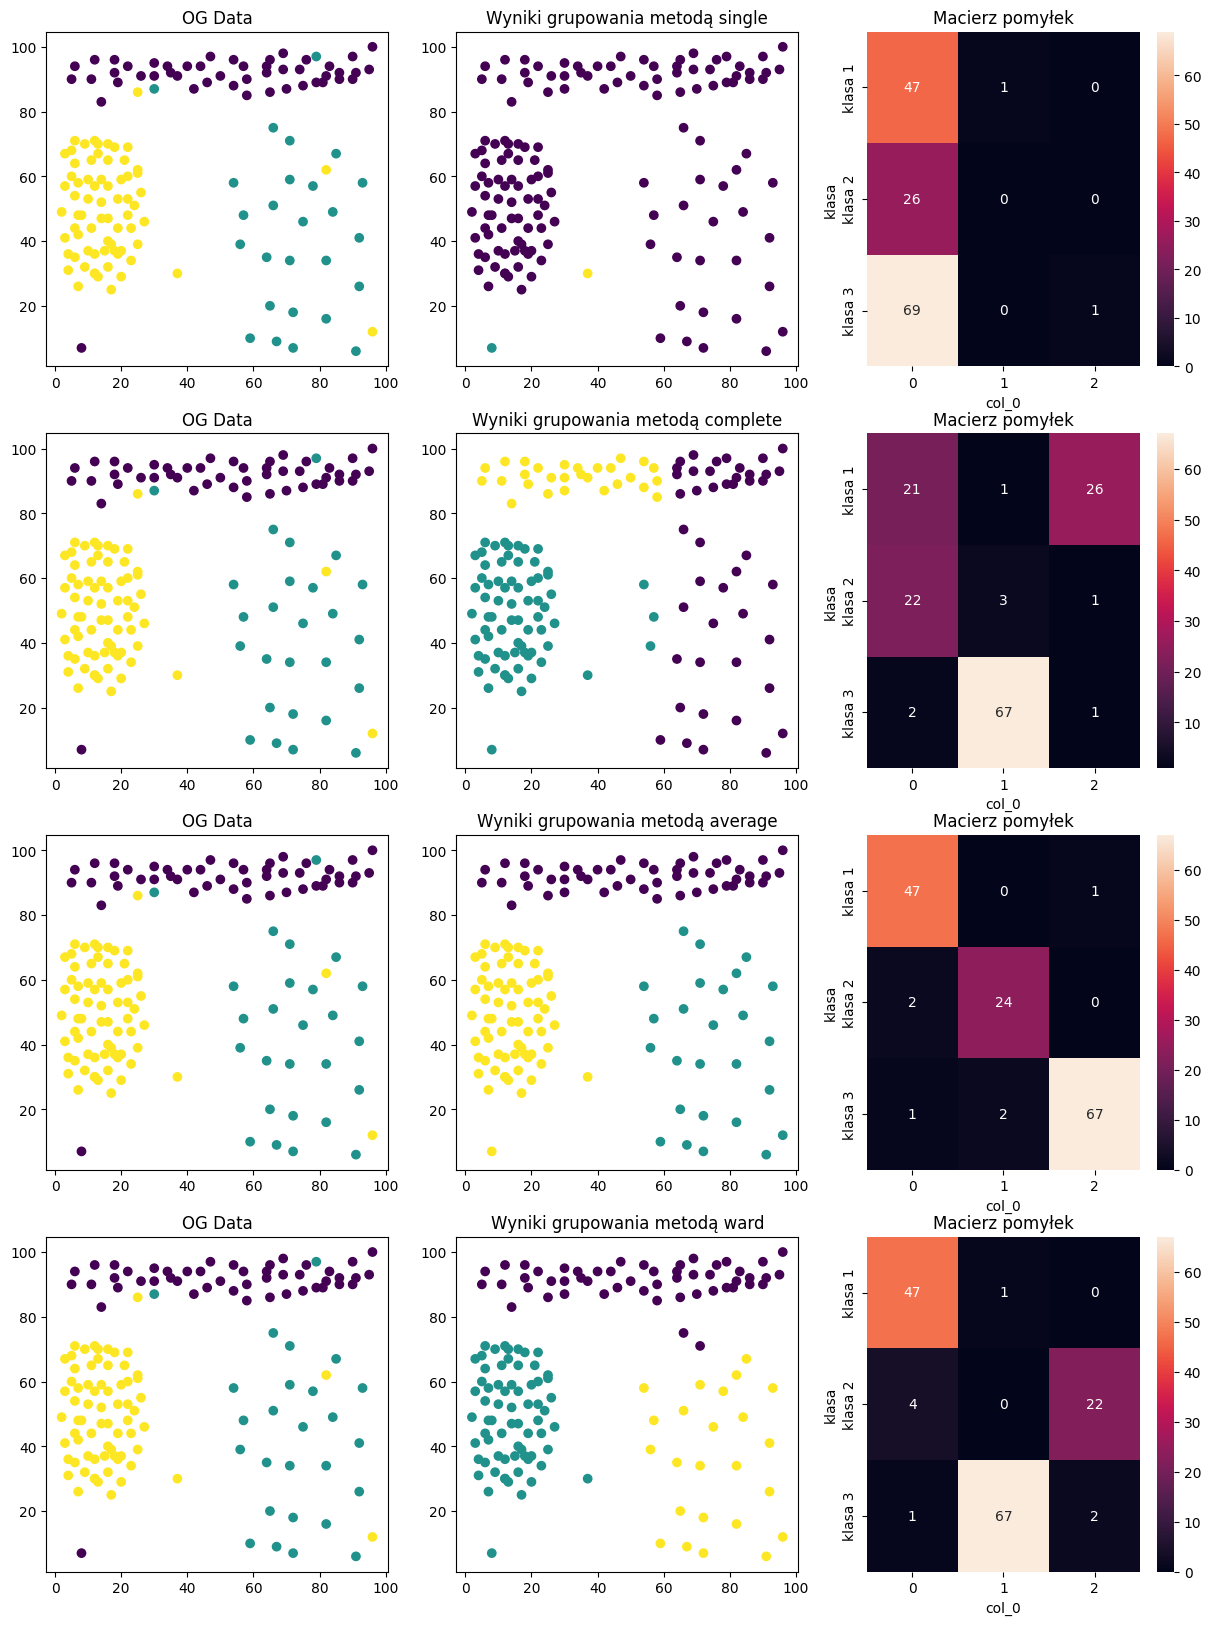

In [9]:
import seaborn as sns

plt.figure(figsize=(15, 20))
data_og, data_noclass = mk_dataframes("dane6.csv")
group_no = 3

metody = ["single", "complete", "average", "ward"]

for i in range(4):
    plt.subplot(4, 3, 3*i+1)
    plt.title("OG Data")
    plt.scatter(data_noclass.atrybut1, data_noclass.atrybut2, c = data_og.klasa.astype("category").cat.codes)

    plt.subplot(4, 3, 3*i+2)
    plt.title(f"Wyniki grupowania metodą {metody[i]}")

    model = AgglomerativeClustering(linkage=metody[i], metric="euclidean", n_clusters=group_no)
    model.fit(data_noclass)

    plt.scatter(data_noclass.atrybut1, data_noclass.atrybut2, c = model.labels_)

    plt.subplot(4, 3, 3*i+3)
    plt.title("Macierz pomyłek")

    differences = pd.crosstab(data_og.klasa, model.labels_)
    sns.heatmap(differences, annot=differences)

W powyższym przykładzie nie mamy metody, która idealnie pasuje do danych. Można jednak wywnioskować, że metody ward i average są najdokładniejsze, ponieważ nie mają wielu dużych wartości.

# 2. Grupowanie k-średnich

Metoda grupowania k średnich polega na wybraniu losowo lub przy użyciu algorytmów punktów środków klastrów (centroidów), przypisanie obiektów do centroidu w taki sposób, żeby wartość odległości od centroidu do przypisanych mu obiektów była jak najmniejsza, a odległość do innych centroidów była jak największa. powtarzamy 2 powyższe kroki, dopóki nie osiągniemy zadowalających wyników.

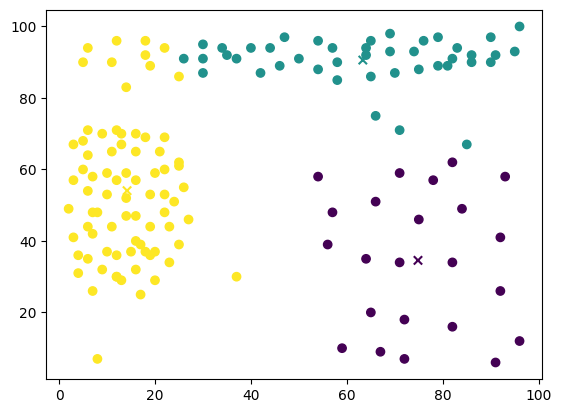

In [15]:
from sklearn.cluster import KMeans

liczba_grup = 3

model = KMeans(n_clusters = liczba_grup, random_state = 0, n_init = 10)
#random_state jest wartością używaną jako seed dla losowych początkowych centroidów
#n_init to liczba, ile razy losowe centroidy są wyznaczane, 10 to aktualna domyślna wartość, ale zostanie ona niedługo zmieniona, więc żeby sklearn nie wypisywał uwag, używam domyślnej wartości
model.fit(data_noclass)

plt.scatter(data_noclass.atrybut1, data_noclass.atrybut2, c = model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = "x", c = range(liczba_grup))
#x to centroidy wyznaczone przez metodę k-średnich

Ważną informacją potrzebną metodzie k-średnich jest liczba grup. Nie jest ona zazwyczaj znana, a ich liczba nie zawsze jest tak oczywista jak dla danych z pliku `dane1.csv`. Mamy do dyspozycji 2 metody:
+ **Metoda Łokciowa** - tworzymy klastry dla rosnącej liczby klastrów a następnie wyświetlamy sumę odległości obiektów od ich klastrów
+ **Metoda sylwetki danych** - wyliczamy wartość średnią wartości sylwetki dla wszystkich obiektów, która wynosi $\frac{b(i)-a(i)}{max\{a(i),b(i)\}}$, gdzie $a(i)$ to odległość od centroidu obiektu a $b(i)$ to odległość od najbliższego, niezaklasyfikowanego centroidu.

W metodzie łokciowej szukamy punktu, dla którego wykres przestaje gwałtownie maleć, a w metodzie sylwetki szukamy punktu, który jest największy. Wartość sylwetki dla każdego punktu może być pomiędzy -1 a 1.

Text(0.5, 1.0, 'Metoda sylwetki danych')

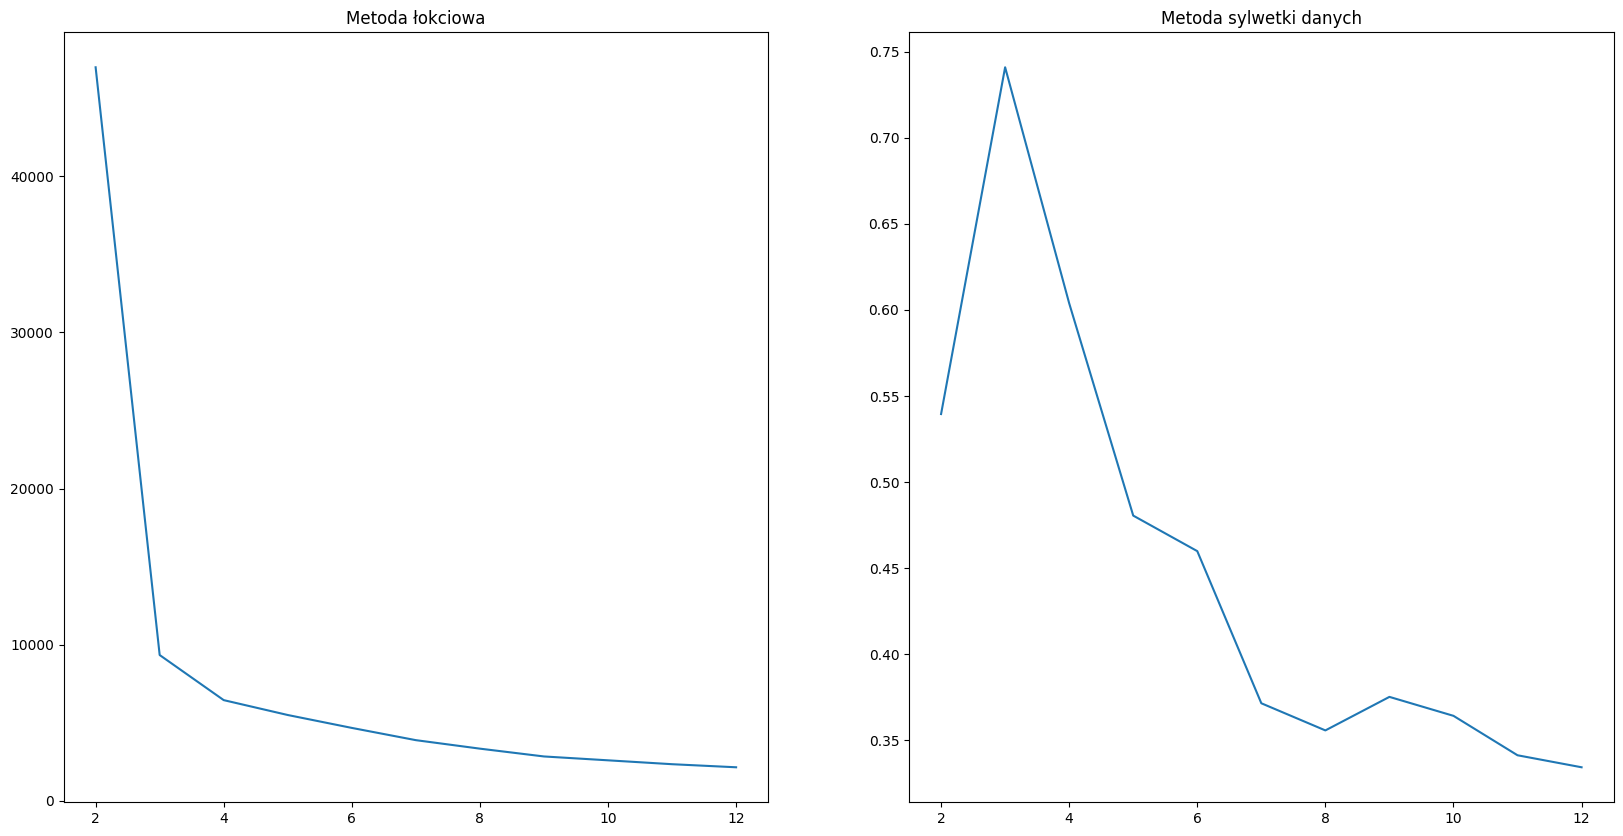

In [20]:
from sklearn.metrics import silhouette_score

data_og, data_noclass = mk_dataframes("dane1.csv")

#funkcja tworząca  
def metoda_lokciowa_i_sylwetki(points, max_no):
    sse = []
    sil_ct = []

    for k in range(2, max_no+1):
        model = KMeans(n_clusters = k, n_init=10).fit(points)
        centroids = model.cluster_centers_
        pred_clusters = model.predict(points)
        curr_sse = 0
        
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            currdata = points.iloc[i]
            for data in range(len(currdata)):
                curr_sse += (currdata.iloc[data] - curr_center[data])**2
        
        sse.append(curr_sse)
        sil_ct.append(silhouette_score(points, model.labels_, metric="euclidean"))
    return (sse, sil_ct)

liczba_grup = 12
sse, sil = metoda_lokciowa_i_sylwetki(data_noclass, liczba_grup)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(range(2, liczba_grup+1), sse)
plt.title("Metoda łokciowa")

plt.subplot(1,2,2)
plt.plot( range(2, liczba_grup+1), sil)
plt.title("Metoda sylwetki danych")

[Źródło](https://ichi.pro/pl/jak-okreslic-optymalne-k-dla-k-srednich-123716630611179)